In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

In [19]:
df = pd.read_csv("../Analisis-de-datos-de-un-Supermercado/supermarket_sales - Sheet1.csv", sep=",")
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 17 columns]

In [20]:
#Dias
df['date'] = pd.to_datetime(df['Date'])

df['day'] = (df['date']).dt.day
df['month'] = (df['date']).dt.month
df['year'] = (df['date']).dt.year
#Horas
df['Time'] = pd.to_datetime(df['Time'])

df['Hour'] = (df['Time']).dt.hour    #type(sales['Time'])

In [21]:
print ()
print (df.dtypes)
print ()
print (df.isnull().sum())
print ()
print ((df==0).sum())
print ()
print (df['Invoice ID'].nunique())


Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                               object
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
date                       datetime64[ns]
day                                 int64
month                               int64
year                                int64
Hour                                int64
dtype: object

Invoice ID                 0
Branch                     0
Ci

# Branch / City

Text(0.5, 1.0, 'Rating by Branch')

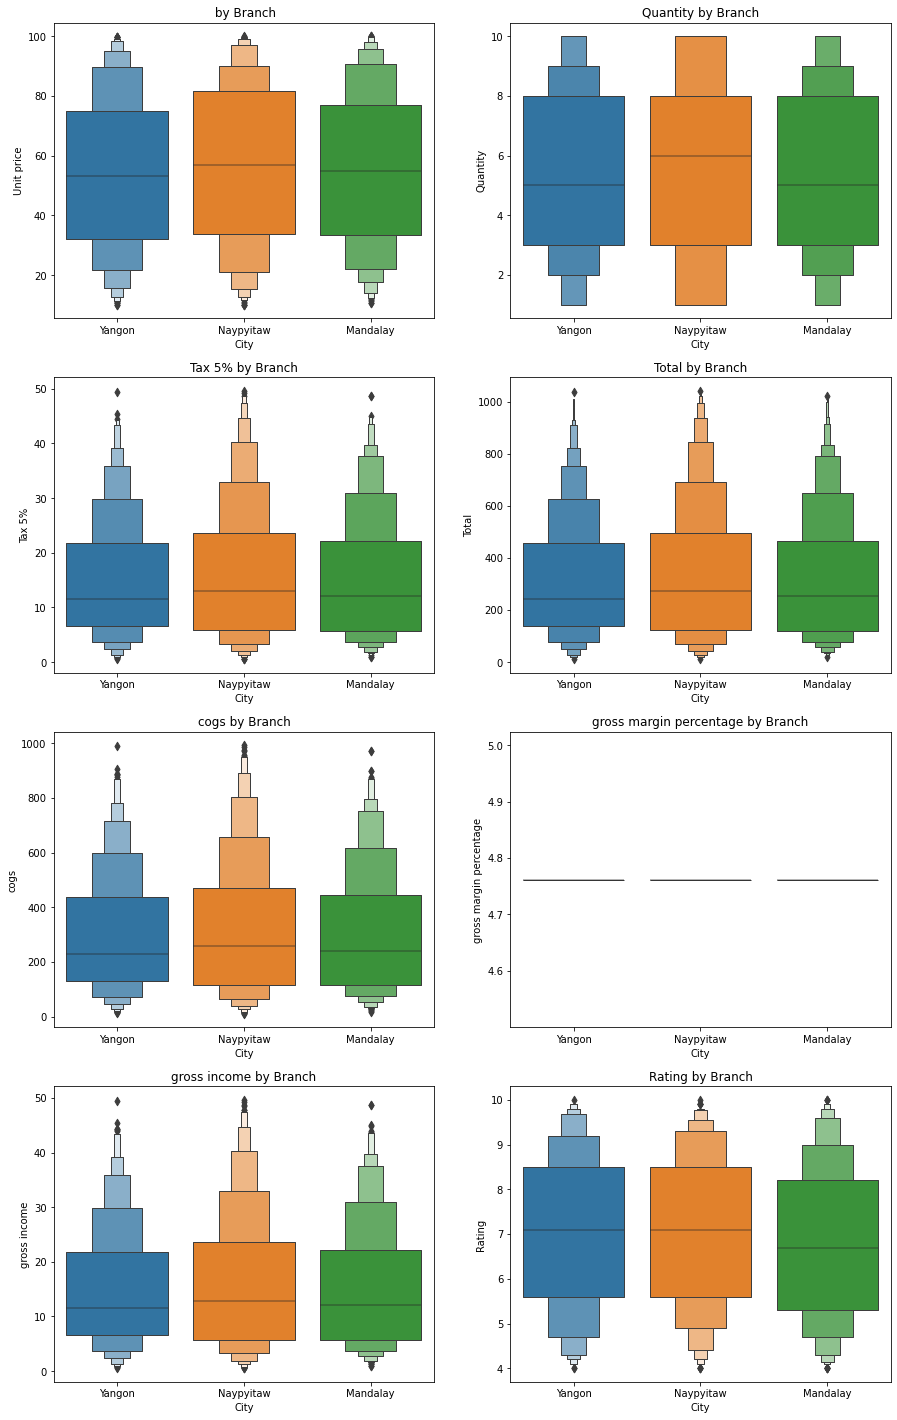

In [30]:
f,axes = plt.subplots(4,2, figsize=(15,25))

sns.boxenplot(x="City",y="Unit price", data=df, ax=axes[0,0],k_depth="tukey").set_title("Unit price by Branch")
sns.boxenplot(x="City",y="Quantity", data=df, ax=axes[0,1],k_depth="proportion" ).set_title("Quantity by Branch")
sns.boxenplot(x="City",y="Tax 5%", data=df, ax=axes[1,0],k_depth="trustworthy" ).set_title("Tax 5% by Branch")
sns.boxenplot(x="City",y="Total", data=df, ax=axes[1,1],k_depth="full").set_title("Total by Branch")
sns.boxenplot(x="City",y="cogs", data=df, ax=axes[2,0],k_depth=5 ).set_title("cogs by Branch")
sns.boxenplot(x="City",y="gross margin percentage", data=df, ax=axes[2,1]).set_title("gross margin percentage by Branch")
sns.boxenplot(x="City",y="gross income", data=df, ax=axes[3,0]).set_title("gross income by Branch")
sns.boxenplot(x="City",y="Rating", data=df, ax=axes[3,1]).set_title("Rating by Branch")


In [22]:
import plotly.express as px
fig = px.histogram(df, x="Total", # y= "XX"
                   color="Gender",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [23]:
import plotly.express as px
fig = px.histogram(df, x="Total", # y= "XX"
                   color="City",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [121]:
# Add histogram data
x1 = df['cogs'].values
x2 = df['Total'].values

# Group data together
hist_data = [x1, x2]

group_labels = ['Cogs', 'Total']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels)
fig.show()

/Users/mateoherasvera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/mateoherasvera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



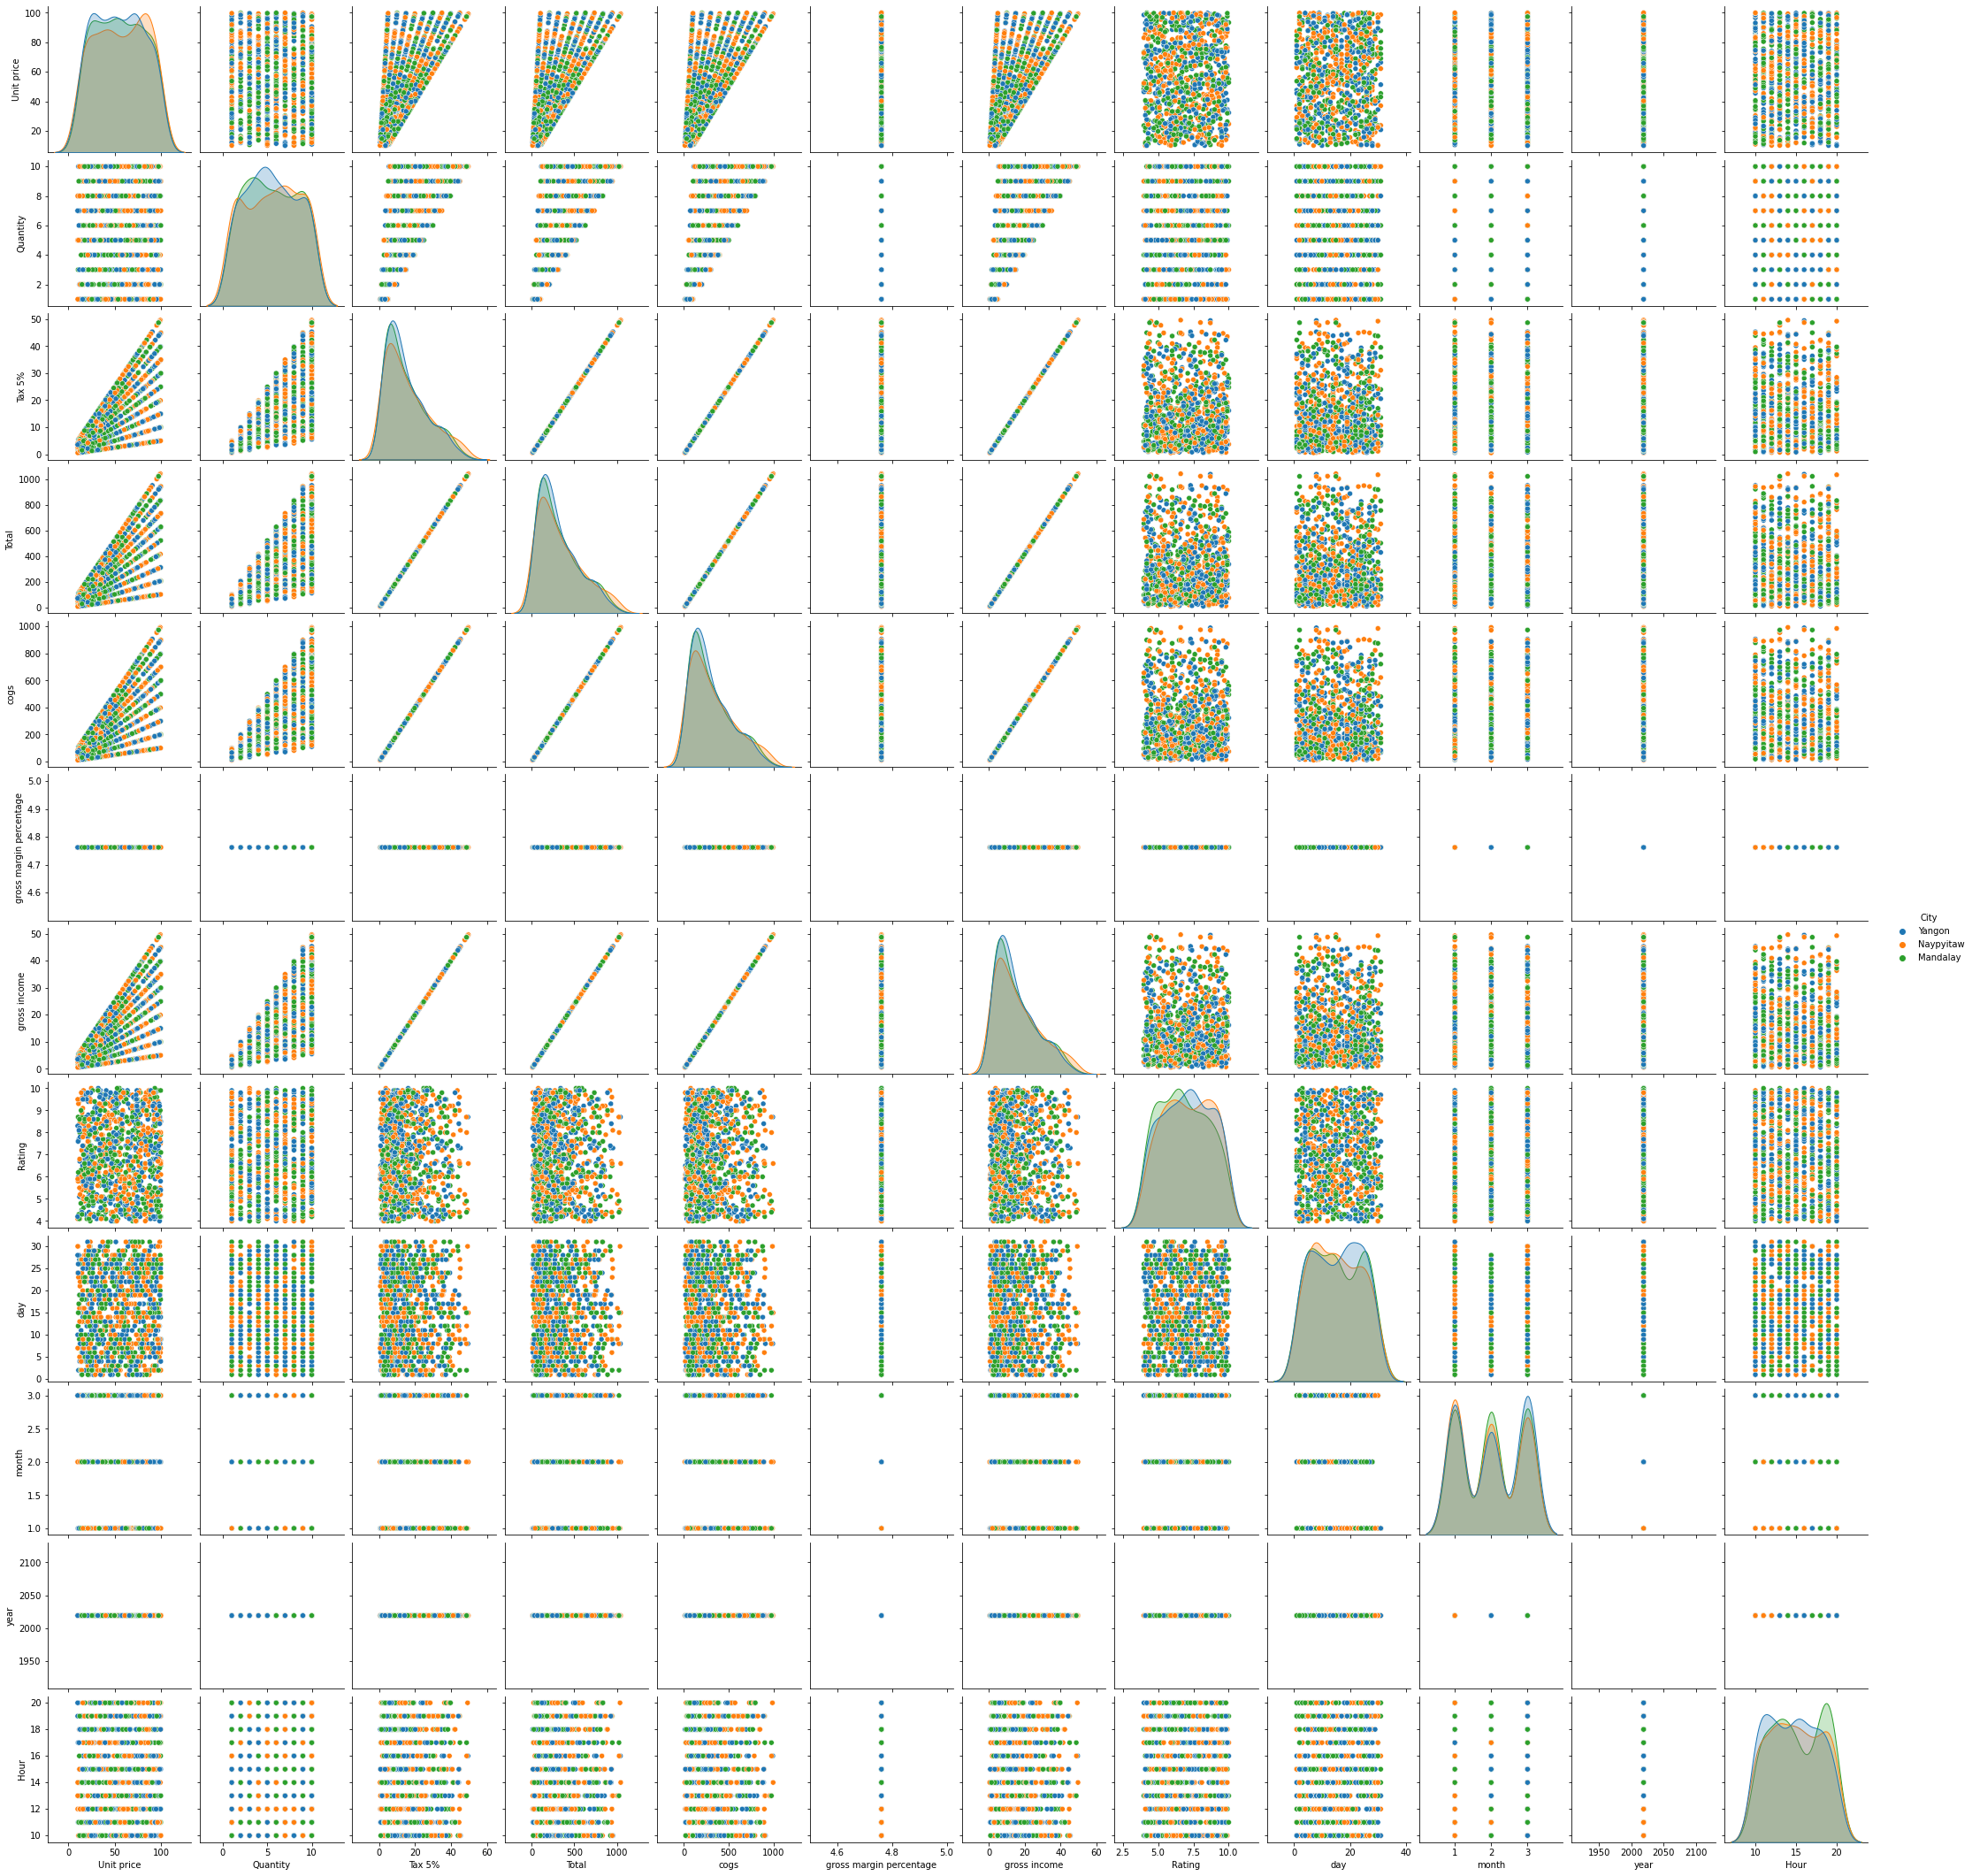

In [6]:
sns.pairplot(df, hue="City")

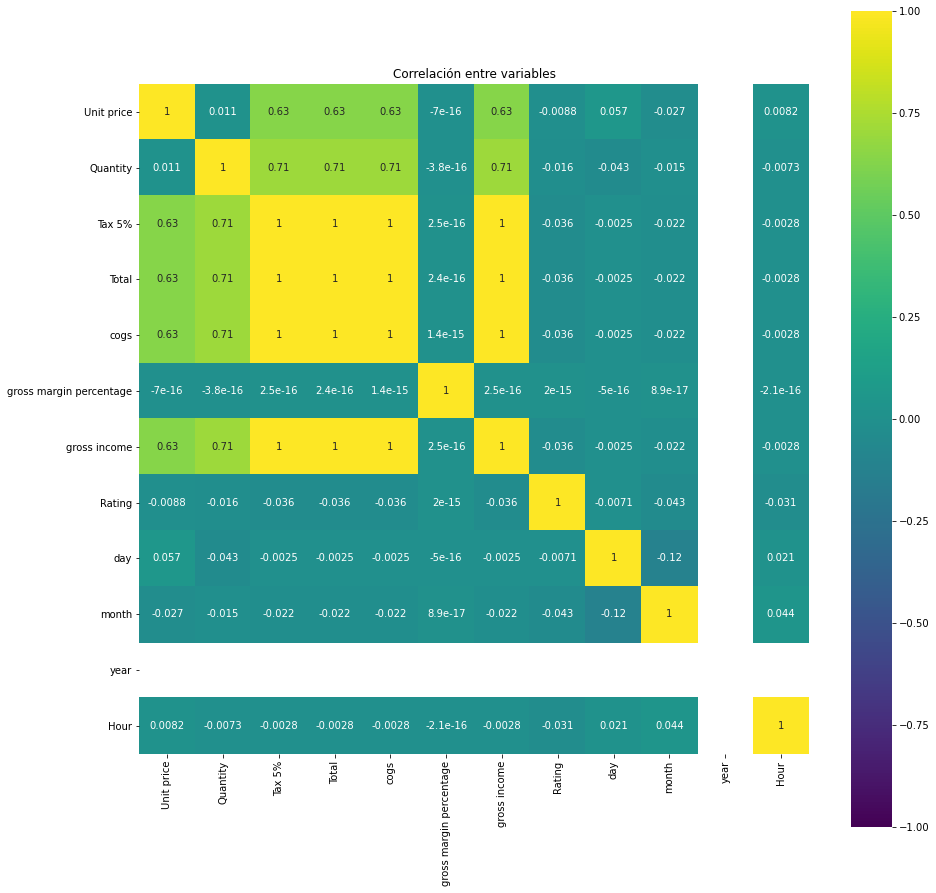

In [7]:
corr = df.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr, vmax=1,vmin=-1,square=True,annot = True, cmap = 'viridis')
plt.title('Correlación entre variables')
plt.show()

In [14]:
fig = px.density_contour(df, x="Total", y="Tax 5%", marginal_x="histogram", marginal_y="histogram")
fig.show()

In [16]:
fig = px.density_contour(df, x="Total", y="Tax 5%", marginal_x="histogram", marginal_y="histogram", facet_col="City", color="smoker")
fig.show()

In [5]:
fig = px.area(df, facet_col="City", facet_col_wrap=2)
fig.show()

ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [6]:
df1 = px.data.stocks(indexed=True)-1
df1

company         GOOG      AAPL      AMZN        FB      NFLX      MSFT
date                                                                  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2018-01-08  0.018172  0.011943  0.061881 -0.040032  0.053526  0.015988
2018-01-15  0.032008  0.019771  0.053240 -0.029757  0.049860  0.020524
2018-01-22  0.066783 -0.019943  0.140676  0.016858  0.307681  0.066561
2018-01-29  0.008773 -0.082857  0.163374  0.018357  0.273537  0.040708
...              ...       ...       ...       ...       ...       ...
2019-12-02  0.216280  0.546914  0.425061  0.075997  0.463641  0.720717
2019-12-09  0.222821  0.572286  0.432660  0.038855  0.421496  0.752239
2019-12-16  0.224418  0.596800  0.453455  0.104094  0.604362  0.784896
2019-12-23  0.226504  0.656000  0.521226  0.113728  0.567170  0.802472
2019-12-30  0.213014  0.678000  0.503360  0.098475  0.540883  0.788185

[105 rows x 6 columns]

In [8]:
type(df1)

pandas.core.frame.DataFrame

In [13]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'date', 'day', 'month', 'year', 'Hour'],
      dtype='object')

In [17]:
x 

array([ 548.9715,   80.22  ,  340.5255,  489.048 ,  634.3785,  627.6165,
        433.692 ,  772.38  ,   76.146 ,  172.746 ,   60.816 ,  107.142 ,
        246.4875,  453.495 ,  749.49  ,  590.436 ,  506.6355,  457.443 ,
        172.2105,   84.63  ,  451.71  ,  277.137 ,   69.72  ,  181.44  ,
        279.1845,  441.756 ,   35.196 ,  184.107 ,  463.89  ,  235.2105,
        494.1825,  737.7615,  703.752 ,  202.818 ,  417.564 ,   71.526 ,
        328.755 ,  575.316 ,  461.328 ,  253.008 ,   91.056 ,  117.831 ,
        435.456 ,  829.08  ,   32.277 ,  394.632 ,  535.7205,  189.0945,
        119.259 ,  867.615 ,  671.79  ,  234.0975,   75.054 ,   16.2015,
         33.936 ,  722.232 ,   93.114 ,  752.64  ,  759.675 ,  192.843 ,
         77.931 ,  351.099 ,  520.4115,  166.005 ,  318.108 ,  166.635 ,
         70.287 ,  614.943 ,  827.085 ,   19.2465,  939.54  ,  652.26  ,
        152.838 ,  478.233 ,  705.6315,  437.325 ,  463.428 ,  189.0945,
        822.255 ,  106.995 ,  624.897 ,  304.542 , 